# Predicting Champagne Sales

This is a project for insights into a winery's champagne sales during the period 1964 to 1972. This data is a time serie available from [Kagle](https://www.kaggle.com/anupamshah/perrin-freres-monthly-champagne-sales).

## 1. Business questions

- 1. Is there a significant trend in the increase in sales of champagne?

- 2. Is there a significant seasonal effect on champagne sales?

- 3. Is it possible to build a model to predict next year's sales?

Because the dataset is composed of a time series with only two columns, time and sales price, it is not possible to answer many questions and answer many assumptions about this company's champagne sales.

## 2. Questions about some business assumptions

- A. In which month is the most champagne sold?

- B. Which month represents the lowest sale?

- C. Is it possible to quantify a growth rate in sales?

## Libraries

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime

#personal library
import timeserietools as tst

import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
%matplotlib inline

## Champagne Dataset

Analysis of the available dataset and beginning of answers to some of the questions and business assumptions.

In [3]:
# Read the dataset as a timeserie format
serie = pd.read_csv("../Projects/datasets/champagne_sales.csv", header=0, index_col=0, parse_dates=True, squeeze=True)

# Read the dataset as a dataframe format
serie_df = pd.read_csv("../Projects/datasets/champagne_sales.csv")

In [4]:
# View first elements in data frame
serie_df.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [11]:
# View the columns data type
serie_df.dtypes

Sales     int64
Month    object
Year      int64
dtype: object

In [12]:
# Describe statistic
serie.describe()

count      105.000000
mean      4761.152381
std       2553.502601
min       1413.000000
25%       3113.000000
50%       4217.000000
75%       5221.000000
max      13916.000000
Name: Sales, dtype: float64

### Answare business questions 

#### Trend and Seasonal analysis

First we index the month column to our dataset index, as well as transform the month column to datetime format.

With the ts_trendseason function, from the self-created timeseriestools library, we can analyze the trend and seasonality of our series graphically with an overview and by month. As well as we can perform a descriptive analysis per month of the series studied.

In [6]:
#Transform month colum to datetime
serie_df['Month'] =  pd.to_datetime(serie_df['Month'], format='%Y-%m') 
#index row by month column
serie_df.set_index("Month",inplace=True)

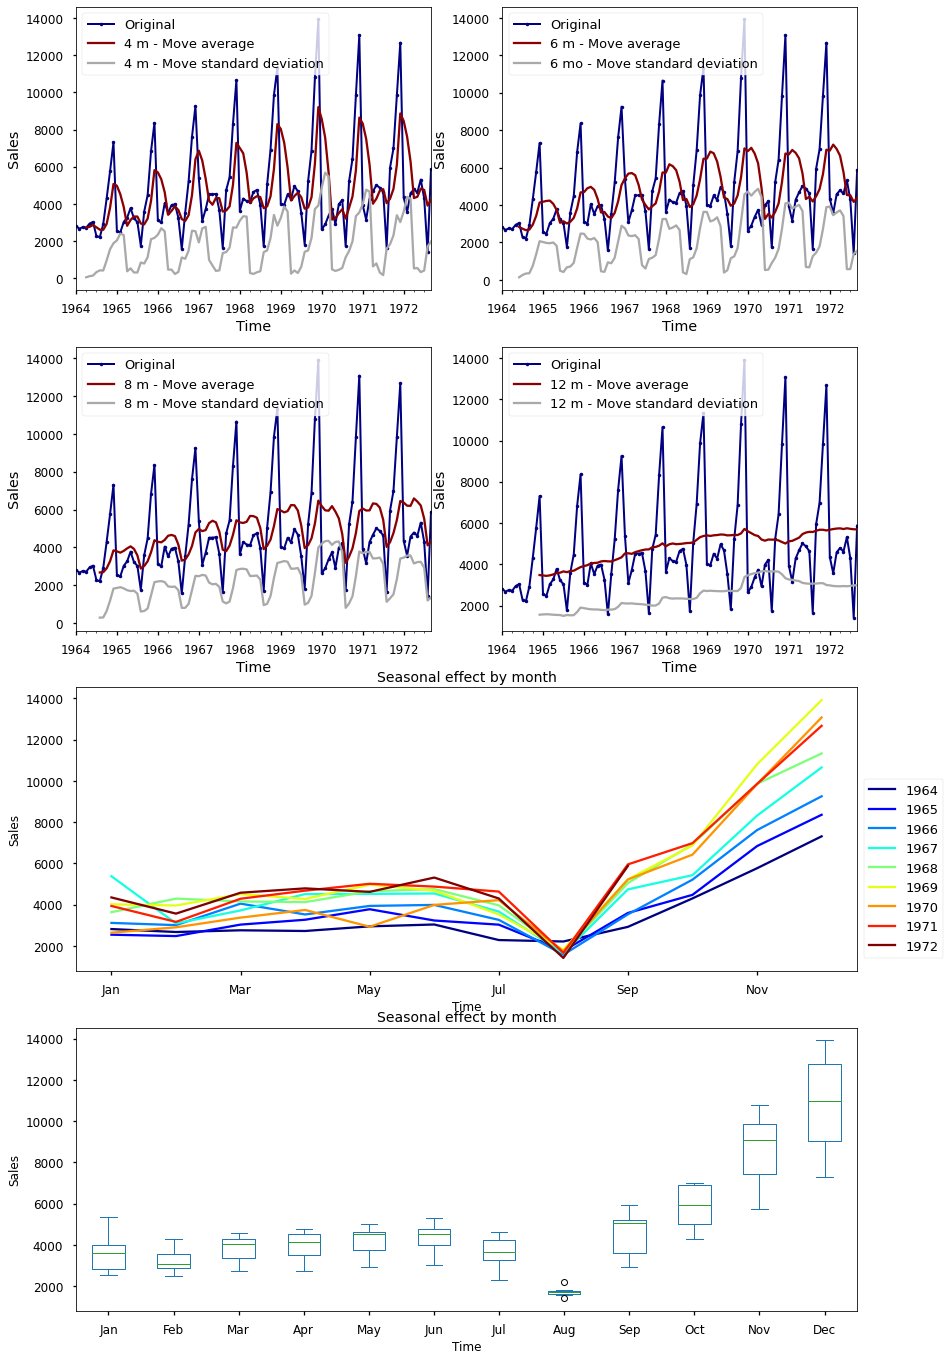

In [7]:
#Apply trend and seasonal analysis to chamoagne serie 
tst.ts_trendseason(serie_df, ylab1="Sales")

- 1. Is there a significant trend in the increase in sales of champagne?

By the trend graph with 4, 6, 8 and 12 move avarege or satandard deviation we can see a positive trend in the champagne serie. There is a positive increase in champagne sold. We can answare better this question by time serie decomposition in next analysis. 

- 2. Is there a significant seasonal effect on champagne sales?

Yes, we can find a seasonal effect in time serie. By the month seasonal effect graph it is possible to affirm that there is a strong seasonal effect between the months.

- A. In which month is the most champagne sold?

December it is the month with most champagne sold. Possibly because December is the month with the festivities that end the year.

- B. Which month represents the lowest sale?

August is the month wit lowest sales. What is the reason? Why august? Well, we can to afirm that August is the same with fewer holidays and festivities. This may just be the beginning of the answer, we should check if there is a possibility that sellers will not make the product available thinking about the end of the year that is coming. We can also think that production decreases. A number of other factors, more information would be needed to extract more knowledge about it.


### Time serie decomposition

Now we move on to a more detailed analysis of our series: graphical analysis of autocorrelation, and partial autocorrelation, qq plot, histogram and ADF-augmented Dickey Fuller test.

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


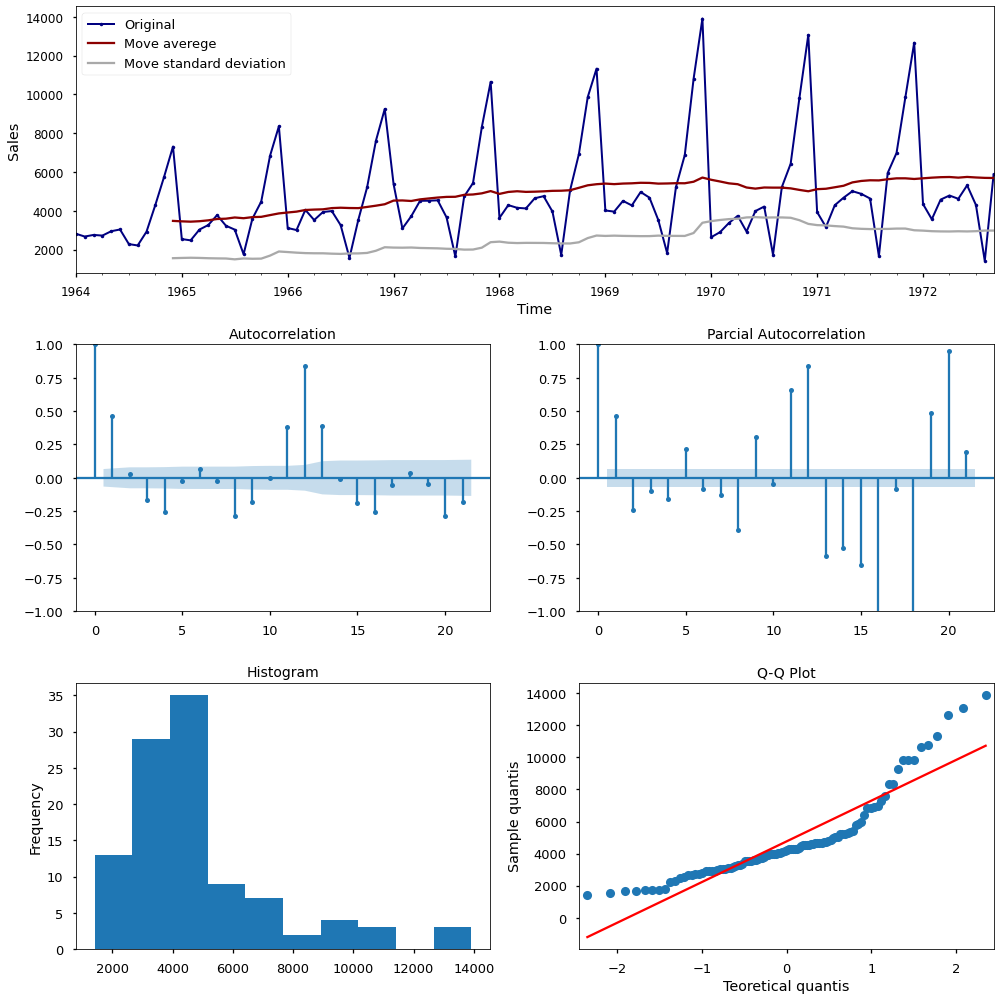



Results of Augmented Dickey-Fuller test:

If p-value < 0.05: Reject null hipoteses, the time serie is stationarity by 5% of significance.
test statistic          -1.833593
p-value                  0.363916
# of lags               11.000000
# of observations       93.000000
Critical Value (1%)     -3.502705
Critical Value (5%)     -2.893158
Critical Value (10%)    -2.583637
dtype: float64


In [9]:
#decomposition and stationarity 
tst.ts_feature(serie, ylab="Sales")

With these analyzes we can conclude that in addition to the positive trend in sales of champagne, the series is not normally distributed, according to the histogram graph and qq plot, in this way the inference on mainly classical models of time series (arima, sarima), can be committed. With the augmented dickey fuller test we understand that the series is non-stationary, so we must add autoregressive components to the model.

## Dataset treatment

Now, we go to split the dataset into train and validation set. 

- dataset.csv: Datas of 1964 to setember of 1971.

- validation.csv: Data of October 1971 until October of 1972 (1 year of sales).


In [10]:
# number of rows minus 12
split_point = len(serie) - 12

# dataset have datas utnil the split_point in rows
dataset = serie[0:split_point]

# the validation csv has data before split_point
validation = serie[split_point:]

# save into disc
dataset.to_csv('../Projects/datasets/dataset.csv')

# save into disc
validation.to_csv('../Projects/datasets/validation.csv')

## Specific a Baseline

- A baseline is a simple value we have to start our project.
- It serves as a reference to know how our model is performing.
- Example: Forecast value is the previous value, in our case, the previous month's value.

In [15]:
# Read the dataset in disc
series = pd.read_csv('../Projects/datasets/champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# set the data into X 
X = series.values

# define the length train set (50%)
train_size = int(len(X) * 0.50)

# train and test: this pratic is not stronger recomended, because we have the validation test defined
train = X[0:train_size]
test = X[train_size:]

# train data historic
history = [x for x in train]

# predictions list
predictions = list()

# applied naive model: baseline
for i in range(len(test)):
  
  # predict_value receives the last value of the training set
  predict_value = history[-1]
  
  # the first prediction is the last value of train set
  predictions.append(predict_value)
  
  # original_value receives the current value of the test.
  original_value = test[i]
  
  # add the original_value to historic list
  history.append(original_value)
  
  # print the predict value and original value
  print('Predict Value = %.3f, Value Spected = %3.f' % (predict_value, original_value))

Predict Value = 4121.000, Value Spected = 4647
Predict Value = 4647.000, Value Spected = 4753
Predict Value = 4753.000, Value Spected = 3965
Predict Value = 3965.000, Value Spected = 1723
Predict Value = 1723.000, Value Spected = 5048
Predict Value = 5048.000, Value Spected = 6922
Predict Value = 6922.000, Value Spected = 9858
Predict Value = 9858.000, Value Spected = 11331
Predict Value = 11331.000, Value Spected = 4016
Predict Value = 4016.000, Value Spected = 3957
Predict Value = 3957.000, Value Spected = 4510
Predict Value = 4510.000, Value Spected = 4276
Predict Value = 4276.000, Value Spected = 4968
Predict Value = 4968.000, Value Spected = 4677
Predict Value = 4677.000, Value Spected = 3523
Predict Value = 3523.000, Value Spected = 1821
Predict Value = 1821.000, Value Spected = 5222
Predict Value = 5222.000, Value Spected = 6872
Predict Value = 6872.000, Value Spected = 10803
Predict Value = 10803.000, Value Spected = 13916
Predict Value = 13916.000, Value Spected = 2639
Predict

To assess the goodness of fit of our model, we will use the statistical test of the square root of the mean error, this test returns a value on the same scale as the data, this facilitates the understanding of the size of the error made by the model. Our baseline has an error of 3167.362 of sales number. 

In [16]:
# naive model (baseline) validation
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 3167.362
